In [1]:
#|****************************************************************|#
#|************* 03_image + CNN (tensorflow v.2.x) ****************|#
#|****************************************************************|# 
#|                                                                |#
#|     prerequisite : python v.3.x                                |#
#|                    tensorflow v.2.x                            |# 
#|                                                                |#
#|     shortcut to run a code : ctl + enter                       |#
#|                                                                |#
#|----------------------------------------------------------------|#
#|     written by: S.Son (soyoun.son@gmail.com)                   |# 
#|                 https://github.com/soyounson                   |# 
#|                                                                |# 
#|     original written date :  Nov/30/2020                       |# 
#|                                                                |# 
#|****************************************************************|#

# ref : https://www.tensorflow.org/tutorials/images/cnn

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [14]:
#**********************
#\\\\\ Load data
#**********************
mnist = tf.keras.datasets.mnist
#______________________
# total 70,000 images 
# resolution 28×28 pixels
# Features 
# train_images : (60000, 28, 28) 
# test_images : (10000, 28, 28)
# Label (an array of intergers, ranging from 0 to 9)
# train_labels : 60000
# test_labels : 10000
#______________________
# divide data into train + test data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images0, train_labels0 = train_images.copy(), train_labels.copy()
# images have 3 channels (RGB) but, MNIST dataset has only one channel (gray).
# add a channel dimension
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
# or 
# train_images = train_images[..., tf.newaxis]
# test_images = test_images[..., tf.newaxis]

#**********************
#\\\\\ Preprocess
#
# Scale these values to a range of 0 to 1 
# before feeding them to the neural network model. 
# To do so, divide the values by 255 (= np.max(train_images)). 
#**********************
train_images, test_images = train_images/ 255.0, test_images / 255.0
# or 
# train_images, test_images = train_images/np.max(train_images), test_images/np.max(test_images)

#**********************
#\\\\\ Label (0~9)
#**********************
class_names = ['zero','one','two','three','four','five','six',
               'seven','eight','nine']

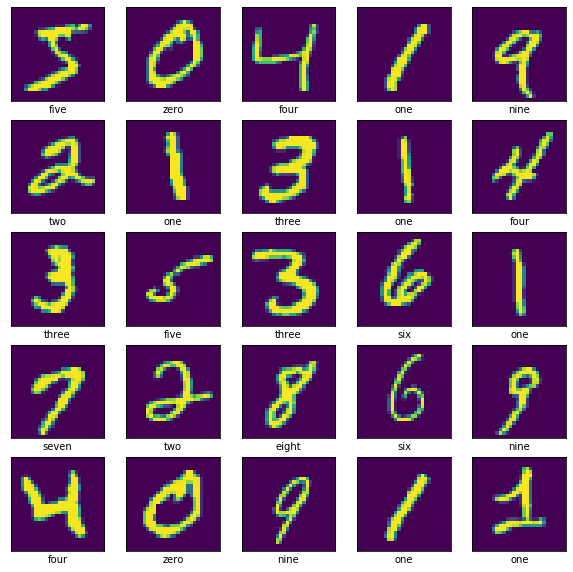

In [15]:
#**********************
#\\\\\ Visualize train dataset
#**********************
plt.figure(figsize =(10,10))
row_no = 5
col_no = 5
for i in range(row_no*col_no):
    plt.subplot(row_no,col_no,i+1)
    plt.imshow(train_images0[i])
    # no grid
    plt.grid(False)
    # disable ticks of the x and y-axis
    plt.xticks([])
    plt.yticks([])
    # plot label
    plt.xlabel(class_names[train_labels0[i]])
    
plt.show()

In [16]:
#**********************
#\\\\\ Build a model 
#**********************
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# dense layer accepts only 1D 
# so Flatten layer is required (3D → 1D)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# 10 outputs 
model.add(layers.Dense(10, activation='softmax'))
#**********************
#\\\\\ Architecture of our model 
#**********************
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [17]:
#**********************
#\\\\\ Compile a model 
#**********************
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

#**********************
#\\\\\ Evaluate 
#**********************
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1499 - accuracy: 0.9540 - val_loss: 0.0444 - val_accuracy: 0.9843
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0471 - accuracy: 0.9849 - val_loss: 0.0328 - val_accuracy: 0.9900
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0337 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.0321 - val_accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0205 - accuracy: 0.9932 - val_loss: 0.0340 - val_accuracy: 0.9892
313/313 - 0s - loss: 0.0340 - accuracy: 0.9892


<IPython.core.display.Javascript object>


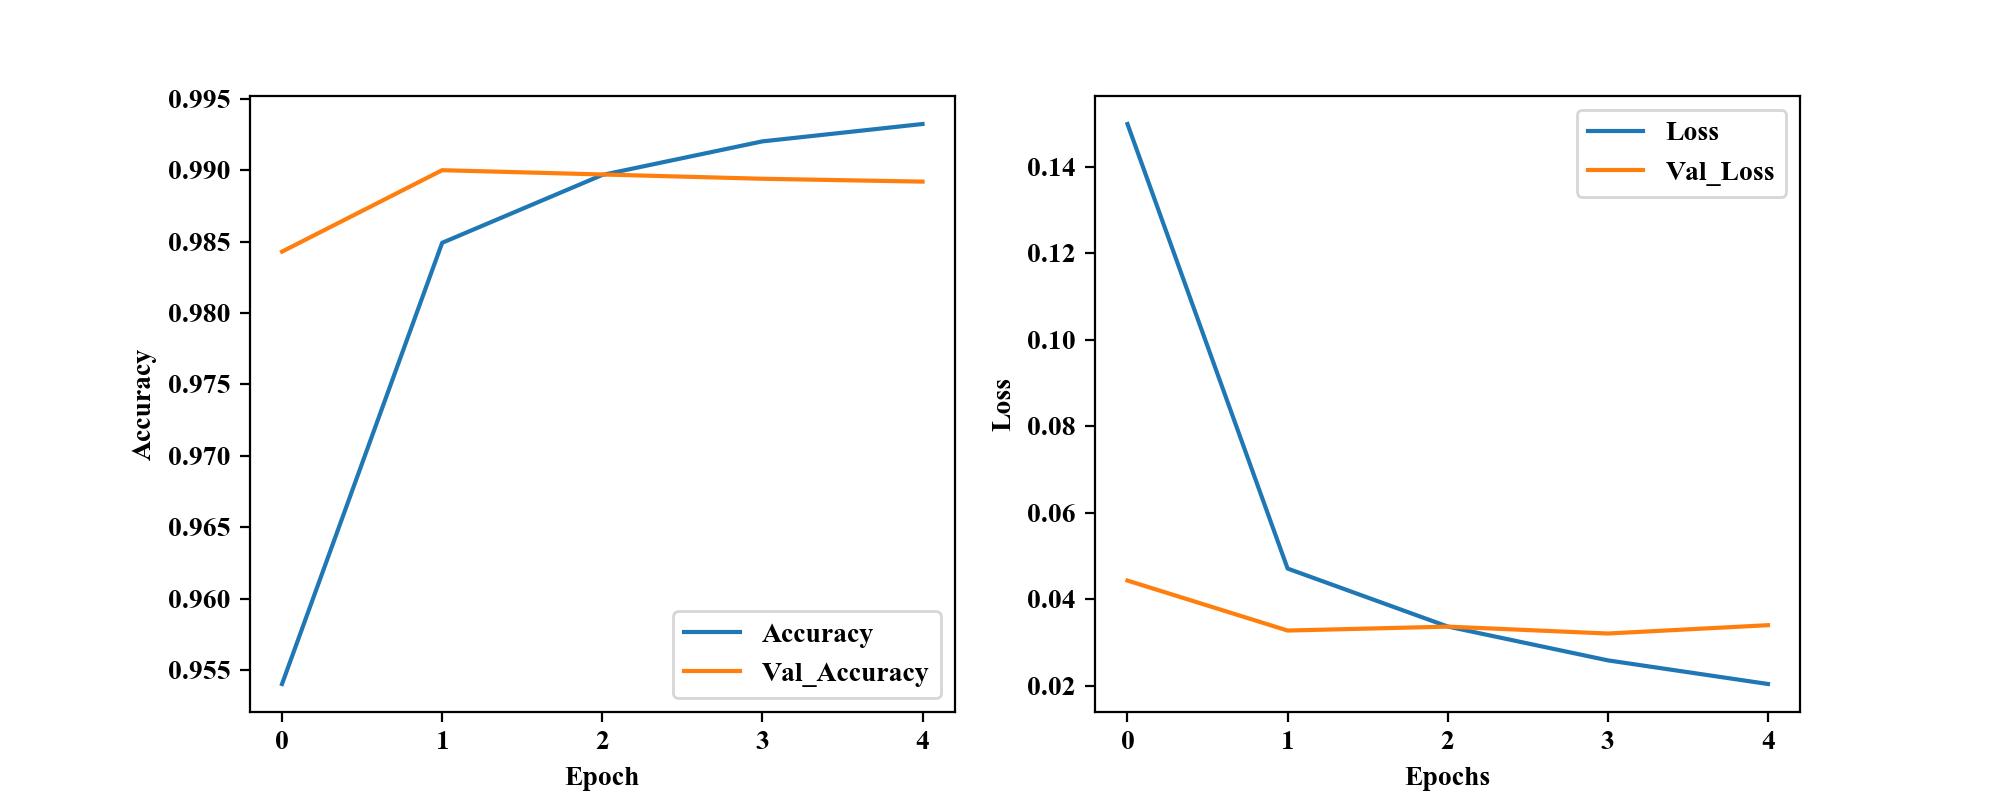

In [20]:
#**********************
#\\\\\ Plot
#**********************
%matplotlib notebook
fig = plt.figure(figsize=(10,4))
plt.rc('font',family='Times New Roman')
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['accuracy'], label='Accuracy')
ax1.plot(history.history['val_accuracy'], label = 'Val_Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
# plt.ylim([0.5, 1]) 
plt.legend(loc='lower right')

#**********************
#\\\\\ Evaluate 
#**********************

ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['loss'],label='Loss')
ax2.plot(history.history['val_loss'],label = 'Val_Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
plt.legend(loc='upper right')

fig.savefig("Accuracy_Loss.pdf", bbox_inches='tight')

In [21]:
#**********************
#\\\\\ Check weights
#**********************
print('======================================')
print('input dimension =', model.input.shape)
print('======================================')
print('output dimension =', model.output.shape)
print('======================================')
print(model.weights)

input dimension = (None, 28, 28, 1)
output dimension = (None, 10)
[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 0.17374545,  0.25335637,  0.09297566,  0.18617319,
          -0.07683254, -0.2713663 , -0.19621749,  0.2651153 ,
           0.07727209, -0.01868838, -0.06753684, -0.08392488,
           0.06338353, -0.25276494, -0.02679436,  0.17937349,
          -0.12386938,  0.0591278 , -0.04141369,  0.20723662,
          -0.36764738, -0.07951633,  0.0970941 , -0.06948893,
           0.06107443,  0.12490942, -0.04993817, -0.09673955,
           0.01214467,  0.06751954,  0.22402534,  0.04999325]],

        [[ 0.07768437,  0.20227621,  0.14433157,  0.11717678,
           0.12927976, -0.06676032, -0.10904157,  0.2488561 ,
           0.159213  ,  0.17764282,  0.05124902, -0.21745135,
          -0.19044915,  0.0327502 ,  0.11305187, -0.06015483,
           0.03072196,  0.03474244, -0.09130561,  0.18853831,
          -0.00336307,  0.20792037,  0.08796055, -0